<a href="https://colab.research.google.com/github/CesarRodriguez19/EstadisticaVerano/blob/main/U_5_examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 14.1 Se realizo un experimento para estudiar los efectos de la temperaura y el tipo de horno sobre la vida de un componente en paticular. En el experimento se utilizaron 4 tipos de hornos y 3 niveles de temperatura.





| Temperatura (°F) | O1  | O2  | O3  | O4  |
|------------------|-----|-----|-----|-----|
| 500              | 227 | 214 | 225 | 260 |
| 500              | 221 | 259 | 236 | 229 |
| 550              | 187 | 181 | 232 | 246 |
| 550              | 208 | 179 | 198 | 273 |
| 600              | 174 | 198 | 178 | 206 |
| 600              | 202 | 194 | 213 | 219 |

A un nivel de significancia de 0.05 pruebe las hipótesis de que:

a) Las diferentes temperaturas no tienen efecto en la vida del componente.

b) Los diferentes hornos no tienen efecto en la vida del componente.

c) No hay interacción entre el tipo de horno y la temperatura.

In [ ]:
import pandas as pd
from io import StringIO

data = '''
temperatura,horno,resultado
500,1,227
500,1,221
500,2,214
500,2,259
500,3,225
500,3,236
500,4,260
500,4,229
550,1,187
550,1,208
550,2,181
550,2,179
550,3,232
550,3,198
550,4,246
550,4,273
600,1,174
600,1,202
600,2,198
600,2,194
600,3,178
600,3,213
600,4,206
600,4,219

'''

df = pd.read_csv(StringIO(data))
df

,temperatura,horno,resultado
0,500,1,227
1,500,1,221
2,500,2,214
3,500,2,259
4,500,3,225
5,500,3,236
6,500,4,260
7,500,4,229
8,550,1,187
9,550,1,208


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'resultado ~ C(temperatura) * C(horno)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(temperatura),5194.083333,2.0,8.129516,0.005863
C(horno),4963.125000,3.0,5.178688,0.015885
C(temperatura):C(horno),3126.250000,6.0,1.631016,0.221520
Residual,3833.500000,12.0,NaN,NaN


valor-p (Shapiro) = 0.5088993359835863


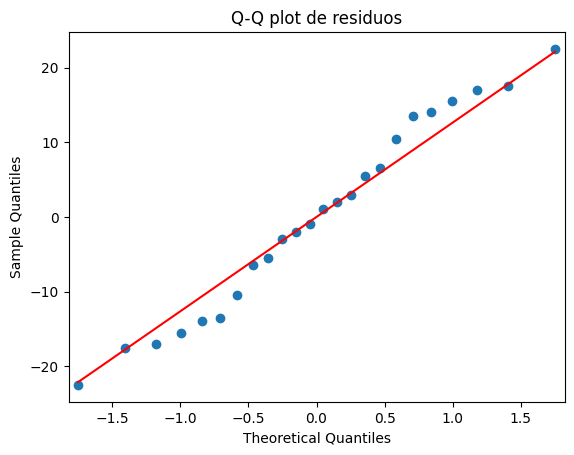

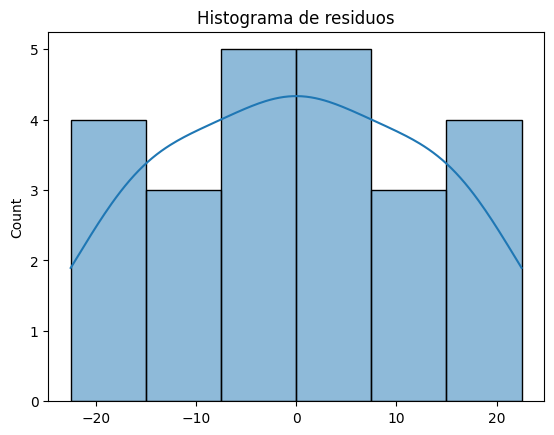

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['temperatura'] == 500]['resultado']
grupo2 = df[df['temperatura'] == 550]['resultado']
grupo3 = df[df['temperatura'] == 600]['resultado']


stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.11268337626251641


In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['horno'] == 1]['resultado']
grupo2 = df[df['horno'] == 2]['resultado']
grupo3 = df[df['horno'] == 3]['resultado']
grupo4 = df[df['horno'] == 4]['resultado']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.9324301793630873


 Multiple Comparison of Means - Tukey HSD, FWER=0.50  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
   500    550  -20.875   0.21 -34.4759  -7.2741   True
   500    600  -35.875 0.0175 -49.4759 -22.2741   True
   550    600    -15.0 0.4331 -28.6009  -1.3991   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

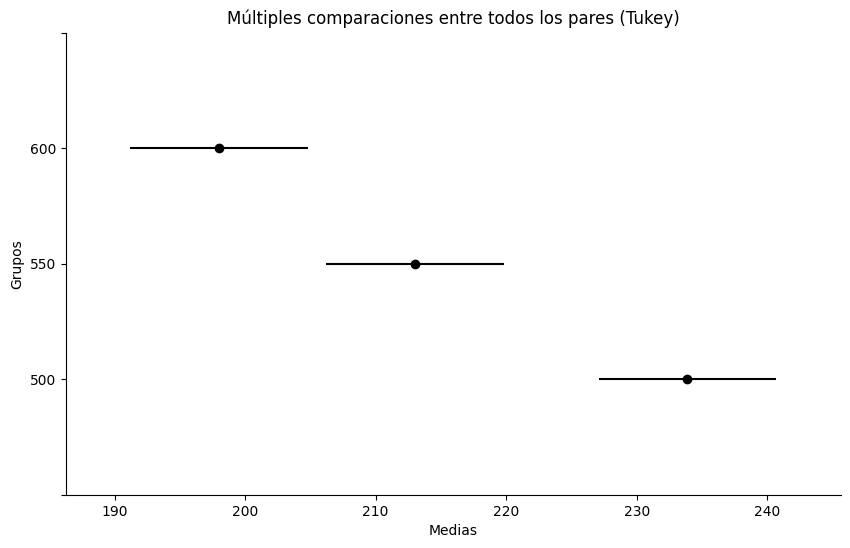

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['resultado'], groups=df['temperatura'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2      1.0 0.9999  -19.26   21.26  False
     1      3     10.5 0.8807   -9.76   30.76  False
     1      4  35.6667 0.0895 15.4067 55.9267   True
     2      3      9.5 0.9081  -10.76   29.76  False
     2      4  34.6667 0.1023 14.4067 54.9267   True
     3      4  25.1667  0.317  4.9067 45.4267   True
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

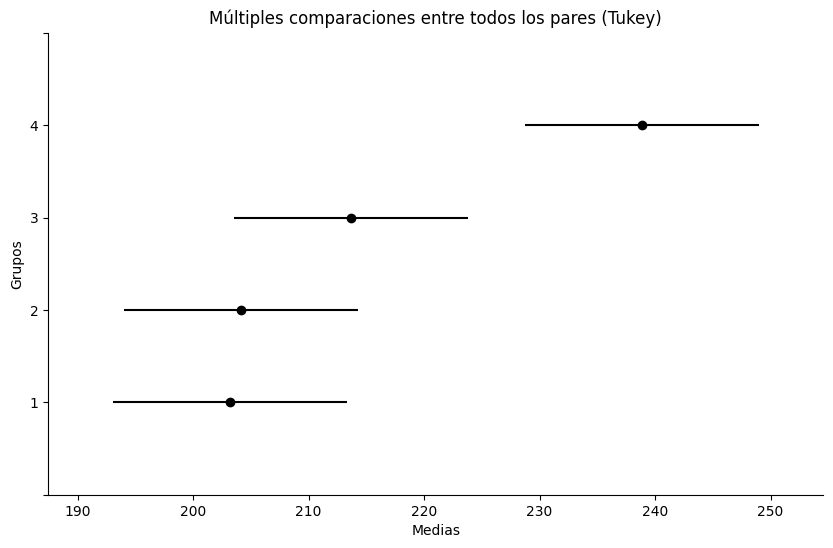

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['resultado'], groups=df['horno'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

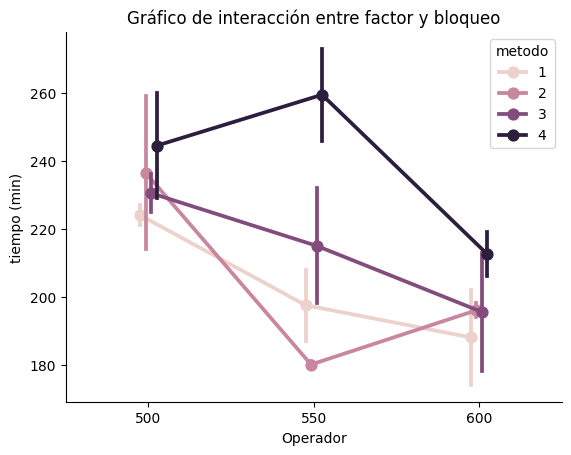

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="temperatura", y="resultado", hue="horno", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("Operador")
plt.ylabel("tiempo (min)")
plt.legend(title="metodo")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()



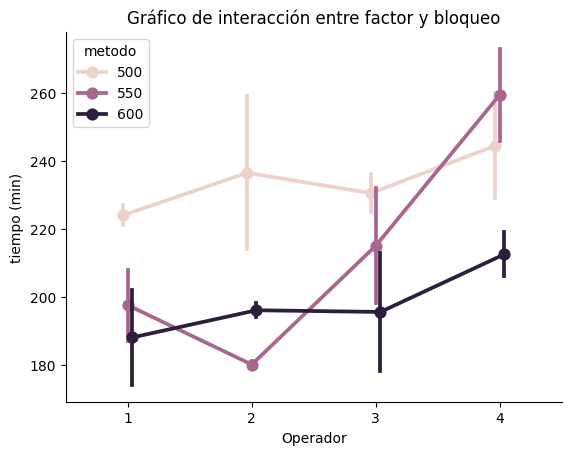

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="horno", y="resultado", hue="temperatura", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("Operador")
plt.ylabel("tiempo (min)")
plt.legend(title="metodo")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()



# 14.5 Para determinar cuáles músculos necesitan someterse a un programa de acondicionamiento para mejorar el rendimiento individual en el servicio tendido que se usa en el tenis, el Departamento de Salud, Educación Física y Recreación de Virginia Tech realizó un estudio de 5 músculos diferentes:

Deltoides anterior

Pectoral mayor

Deltoides posterior

Deltoides medio

Tríceps

los cuales se probaron en cada uno de 3 sujetos; el experimento se efectuó 3 veces para cada combinación de tratamiento. Los datos electromiográficos que se registraron durante el servicio se presentan a continuación.

| Sujeto | Músculo | Valores    |
| ------ | ------- | ---------- |
| 1      | 1       | 32, 59, 38 |
| 1      | 2       | 5, 1.5, 2  |
| 1      | 3       | 58, 61, 66 |
| 1      | 4       | 10, 10, 14 |
| 1      | 5       | 19, 20, 23 |
| 2      | 1       | 63, 60, 50 |
| 2      | 2       | 10, 9, 7   |
| 2      | 3       | 64, 78, 78 |
| 2      | 4       | 45, 61, 71 |
| 2      | 5       | 43, 61, 42 |
| 3      | 1       | 43, 54, 47 |
| 3      | 2       | 41, 43, 42 |
| 3      | 3       | 26, 29, 23 |
| 3      | 4       | 63, 46, 55 |
| 3      | 5       | 61, 85, 95 |



Utilice un nivel de significancia de 0.01 para probar las
hipótesis de que

 a) diferentes sujetos tienen medidas electromiográfi -
cas iguales;

 b) los diferentes músculos no tienen un efecto en las
medidas electromiográficas;

 c) no hay interacción entre los sujetos y los tipos de
músculos.

In [ ]:
import pandas as pd
from io import StringIO

data = '''
musculo,sujeto,valor
1,1,32
1,1,59
1,1,38
1,2,5
1,2,1.5
1,2,2
1,3,58
1,3,61
1,3,66
2,1,10
2,1,10
2,1,14
2,2,19
2,2,20
2,2,23
2,3,63
2,3,60
2,3,50
3,1,10
3,1,9
3,1,7
3,2,64
3,2,78
3,2,78
3,3,45
3,3,61
3,3,71
4,1,43
4,1,61
4,1,42
4,2,43
4,2,54
4,2,47
4,3,41
4,3,43
4,3,42
5,1,26
5,1,29
5,1,23
5,2,63
5,2,46
5,2,55
5,3,61
5,3,85
5,3,95

'''

df = pd.read_csv(StringIO(data))
df

,musculo,sujeto,valor
0,1,1,32.0
1,1,1,59.0
2,1,1,38.0
3,1,2,5.0
4,1,2,1.5
5,1,2,2.0
6,1,3,58.0
7,1,3,61.0
8,1,3,66.0
9,2,1,10.0


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'valor ~ C(musculo) + C(sujeto)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(musculo),3260.533333,4.0,2.145974,0.093913
C(sujeto),8125.411111,2.0,10.695750,0.000207
Residual,14434.033333,38.0,NaN,NaN


valor-p (Shapiro) = 0.40738186177314273


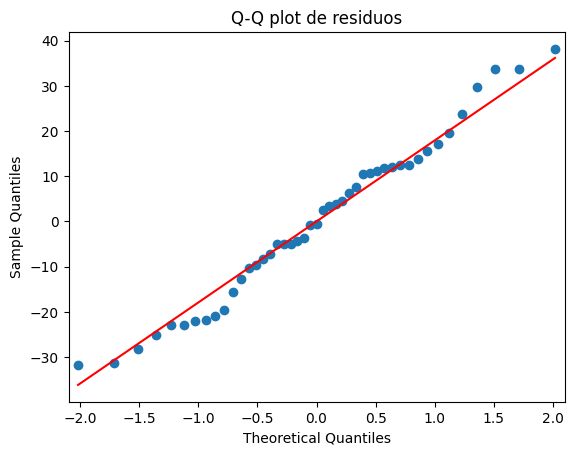

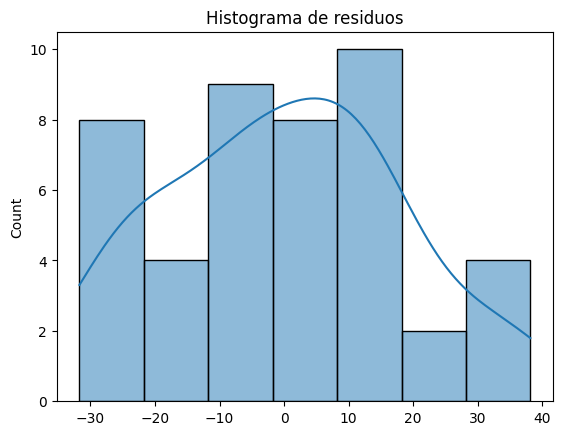

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['musculo'] == 1]['valor']
grupo2 = df[df['musculo'] == 2]['valor']
grupo3 = df[df['musculo'] == 3]['valor']
grupo4 = df[df['musculo'] == 4]['valor']
grupo5 = df[df['musculo'] == 5]['valor']

stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.05570941817348722


 Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -5.9444 0.9836 -23.9677 12.0788  False
     1      3  11.1667 0.8549  -6.8566 29.1899  False
     1      4  10.3889 0.8843  -7.6344 28.4122  False
     1      5  17.8333 0.5105  -0.1899 35.8566  False
     2      3  17.1111 0.5507  -0.9122 35.1344  False
     2      4  16.3333 0.5943  -1.6899 34.3566  False
     2      5  23.7778 0.2302   5.7545  41.801   True
     3      4  -0.7778    1.0  -18.801 17.2455  False
     3      5   6.6667  0.975 -11.3566 24.6899  False
     4      5   7.4444 0.9627 -10.5788 25.4677  False
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

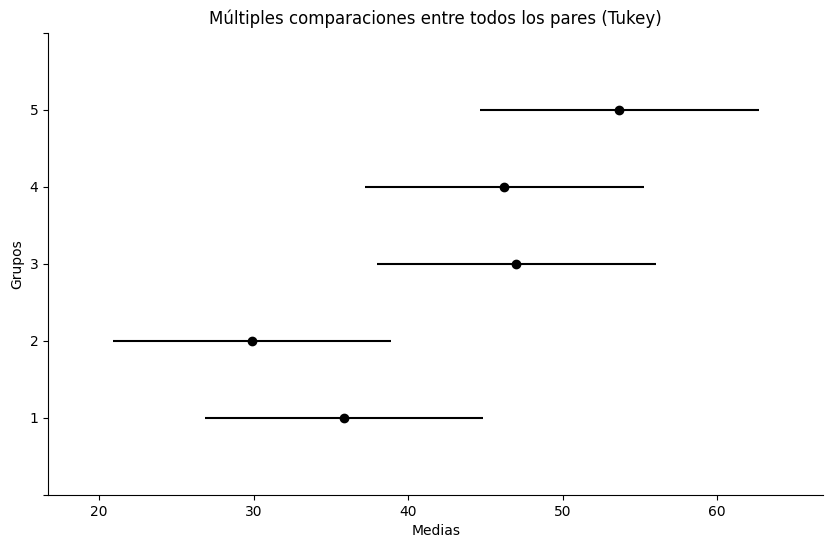

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['valor'], groups=df['musculo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

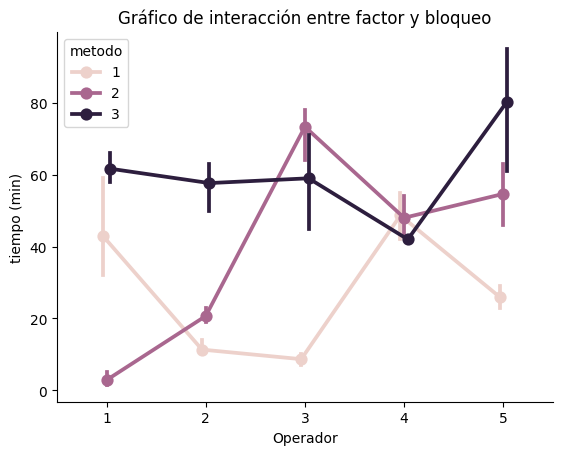

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="musculo", y="valor", hue="sujeto", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("Operador")
plt.ylabel("tiempo (min)")
plt.legend(title="metodo")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()



# 14.6 Se realizó un experimento para determinar si los aditivos incrementan la adherencia de productos de caucho. Se elaboraron 16 productos con el aditivo nuevo y otros 16 sin dicho aditivo. Se registro la siguiente adherencia.

| Aditivo         | Temp (°C) | Valores                        |
|-----------------|-----------|--------------------------------|
| Sin el aditivo  | 50        | 2.3, 2.9, 3.1, 3.2             |
| Sin el aditivo  | 60        | 3.4, 3.7, 3.6, 3.2             |
| Sin el aditivo  | 70        | 3.8, 3.9, 4.1, 3.8             |
| Sin el aditivo  | 80        | 3.9, 3.2, 3.0, 2.7             |
| Con el aditivo  | 50        | 4.3, 3.9, 3.9, 4.2             |
| Con el aditivo  | 60        | 3.8, 3.8, 3.9, 3.5             |
| Con el aditivo  | 70        | 3.9, 4.0, 3.7, 3.6             |
| Con el aditivo  | 80        | 3.5, 3.6, 3.8, 3.9             |


Haga un análisis de varianza para probar la existencia de efectos principales y de interacción significativos.

In [ ]:
import pandas as pd
from io import StringIO

data = '''
adhitivo,temperatura,valor
Sin,50,2.3
Sin,50,2.9
Sin,50,3.1
Sin,50,3.2
Sin,60,3.4
Sin,60,3.7
Sin,60,3.6
Sin,60,3.2
Sin,70,3.8
Sin,70,3.9
Sin,70,4.1
Sin,70,3.8
Sin,80,3.9
Sin,80,3.2
Sin,80,3.0
Sin,80,2.7
Con,50,4.3
Con,50,3.9
Con,50,3.9
Con,50,4.2
Con,60,3.8
Con,60,3.8
Con,60,3.9
Con,60,3.5
Con,70,3.9
Con,70,4.0
Con,70,3.7
Con,70,3.6
Con,80,3.5
Con,80,3.6
Con,80,3.8
Con,80,3.9

'''

df = pd.read_csv(StringIO(data))
df

,adhitivo,temperatura,valor
0,Sin,50,2.3
1,Sin,50,2.9
2,Sin,50,3.1
3,Sin,50,3.2
4,Sin,60,3.4
5,Sin,60,3.7
6,Sin,60,3.6
7,Sin,60,3.2
8,Sin,70,3.8
9,Sin,70,3.9


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'valor ~ C(adhitivo) + C(temperatura)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(adhitivo),1.757812,1.0,12.876219,0.001301
C(temperatura),0.805937,3.0,1.967868,0.142586
Residual,3.685937,27.0,NaN,NaN


valor-p (Shapiro) = 0.8227515951343359


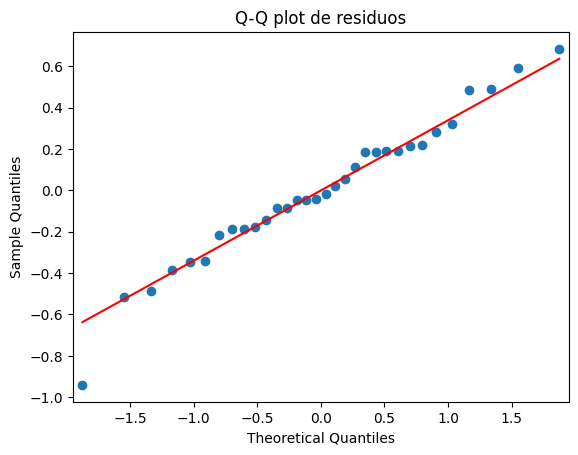

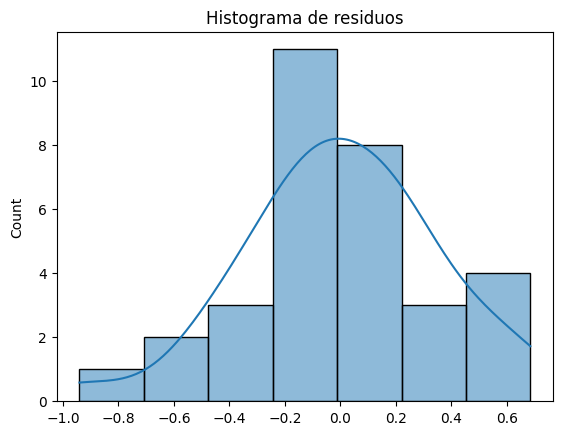

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['adhitivo'] == 'Sin']['valor']
grupo2 = df[df['adhitivo'] == 'Con']['valor']


stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.0031374959303320845


Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   Con    Sin  -0.4688 0.0018 -0.5622 -0.3753   True
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

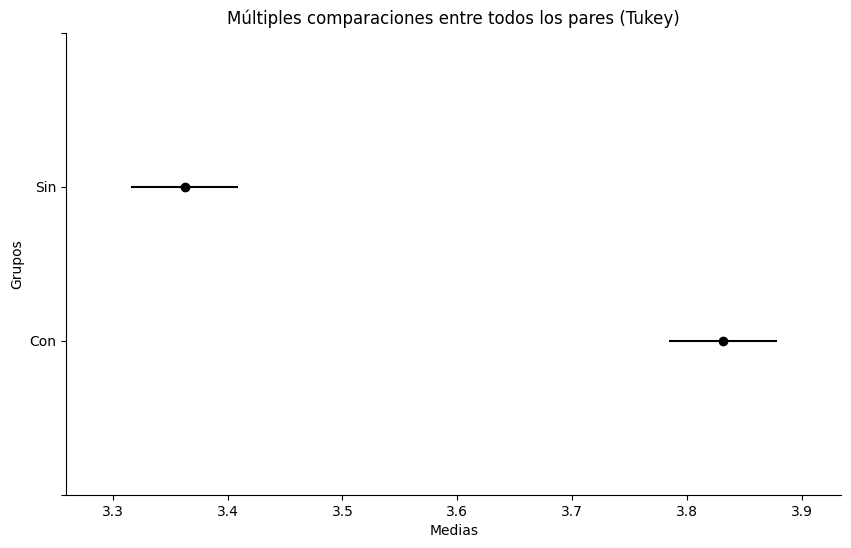

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['valor'], groups=df['adhitivo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

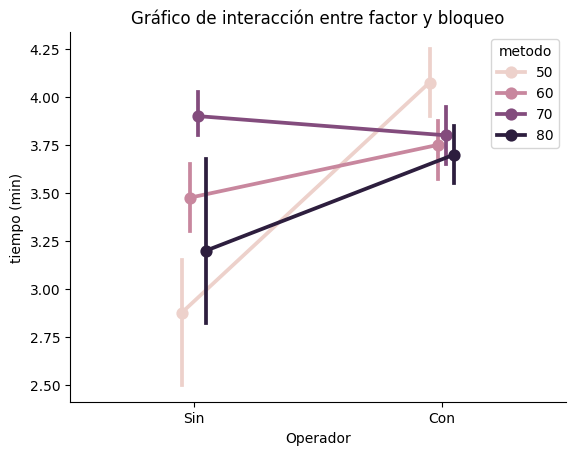

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="adhitivo", y="valor", hue="temperatura", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("Operador")
plt.ylabel("tiempo (min)")
plt.legend(title="metodo")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()



Lambda óptimo: 3.97850540597193


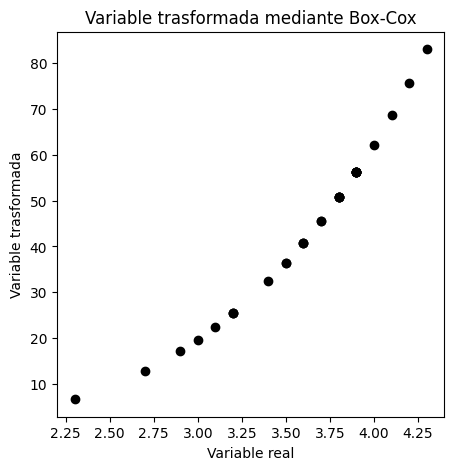

In [ ]:
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["valor_boxcox"], lambda_opt = boxcox(df["valor"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["valor"], df["valor_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'valor_boxcox ~ C(adhitivo) + C(temperatura)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(adhitivo),2771.103929,1.0,11.981412,0.001804
C(temperatura),1174.841080,3.0,1.693219,0.192014
Residual,6244.656584,27.0,NaN,NaN


valor-p (Shapiro) = 0.5762157089767007


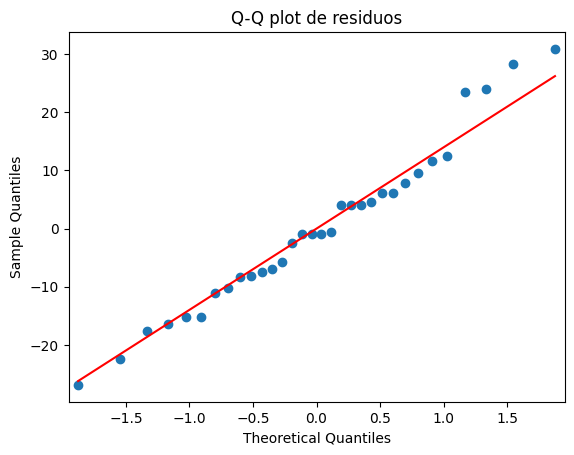

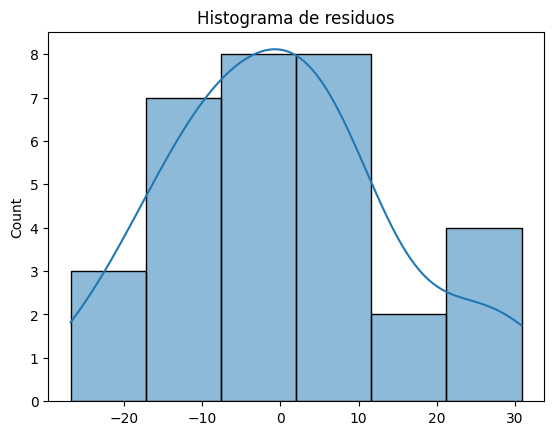

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['adhitivo'] == 'Sin']['valor_boxcox']
grupo2 = df[df['adhitivo'] == 'Con']['valor_boxcox']


stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.08580570655408863


 Multiple Comparison of Means - Tukey HSD, FWER=0.50  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
   Con    Sin -18.6115 0.0022 -22.4077 -14.8153   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

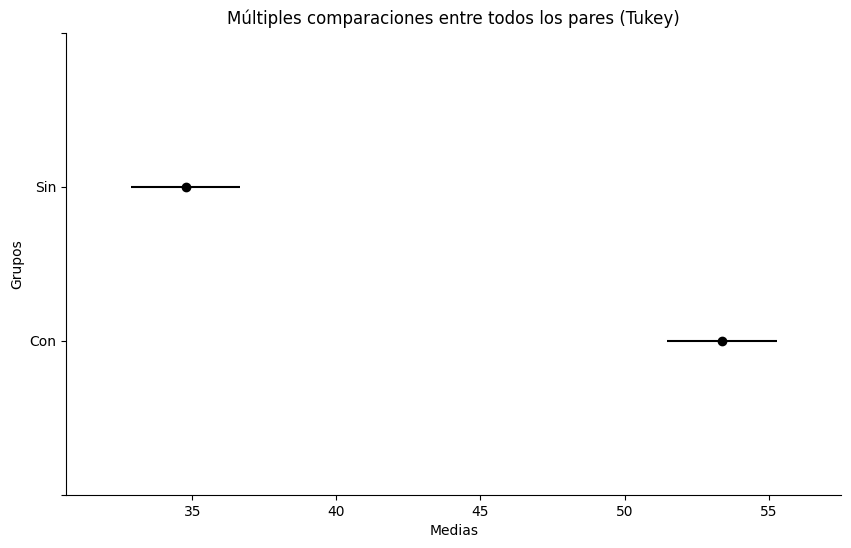

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['valor_boxcox'], groups=df['adhitivo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

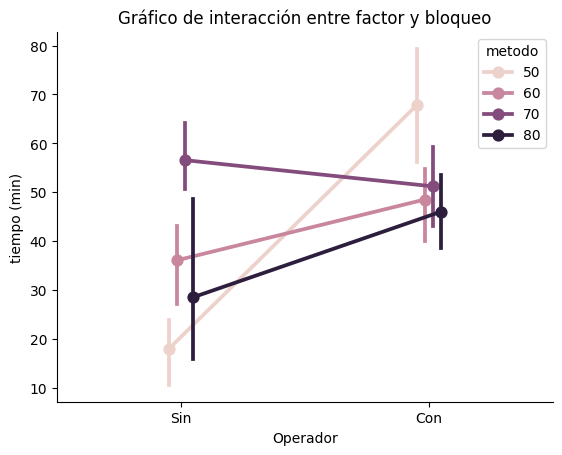

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="adhitivo", y="valor_boxcox", hue="temperatura", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("Operador")
plt.ylabel("tiempo (min)")
plt.legend(title="metodo")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()



#14.9 Un ingeniero está interesado en los efectos de la velocidad de corte y la geometría de la herramienta sobre las horas de vida de una máquina-herramienta. Se utilizan 2 velocidades de corte y 2 geometrías distintas. Se llevan a cabo 3 pruebas experimentales con cada una de las 4 combinaciones. Los datos son los siguientes:


a) Calcule la tabla del análisis de varianza con pruebas sobre los efectos principales y de interacción.

b) Haga comentarios sobre el efecto que tiene la interacción sobre la prueba de la velocidad de corte.

c) Efectúe pruebas secundarias que permitan al ingeniero conocer el verdadero impacto de la velocidad de corte.

d ) Construya una gráfi ca que ilustre el efecto de interacción.

In [ ]:

import pandas as pd
from io import StringIO

data = '''
geometria,nivel,respuesta
1,Baja 1,22
1,Baja 2,28
1,Baja 3,20
1,Alta 1,34
1,Alta 2,37
1,Alta 3,29
2,Baja 1,18
2,Baja 2,15
2,Baja 3,16
2,Alta 1,11
2,Alta 2,10
2,Alta 3,10
'''

df = pd.read_csv(StringIO(data))
df

,geometria,nivel,respuesta
0,1,Baja 1,22
1,1,Baja 2,28
2,1,Baja 3,20
3,1,Alta 1,34
4,1,Alta 2,37
5,1,Alta 3,29
6,2,Baja 1,18
7,2,Baja 2,15
8,2,Baja 3,16
9,2,Alta 1,11


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'respuesta ~ C(geometria) + C(nivel)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova


,sum_sq,df,F,PR(>F)
C(geometria),675.000000,1.0,14.361702,0.012763
C(nivel),41.666667,5.0,0.177305,0.959668
Residual,235.000000,5.0,NaN,NaN


valor-p (Shapiro) = 0.1398524337612947
Los residuos siguen una distribución normal


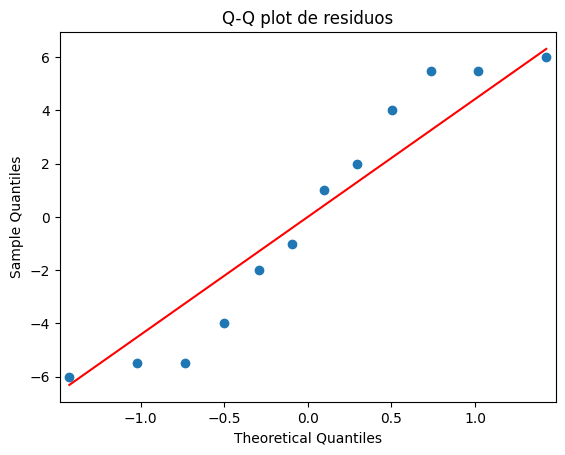

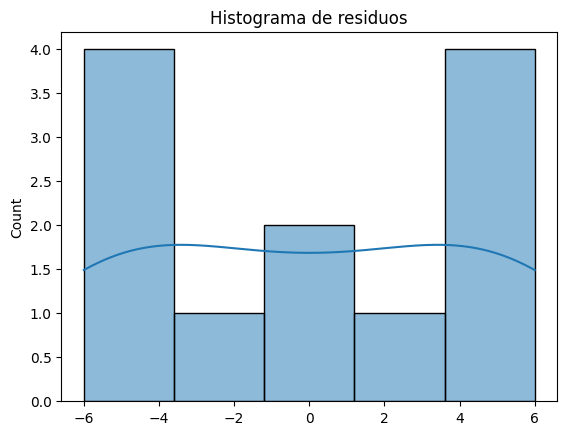

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
if valor_p_sh > 0.05:
    print("Los residuos siguen una distribución normal")
else:
    print("Los residuos no siguen una distribución normal")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['geometria'] == 1]['respuesta']
grupo2 = df[df['geometria'] == 2]['respuesta']

stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.23020094235074592


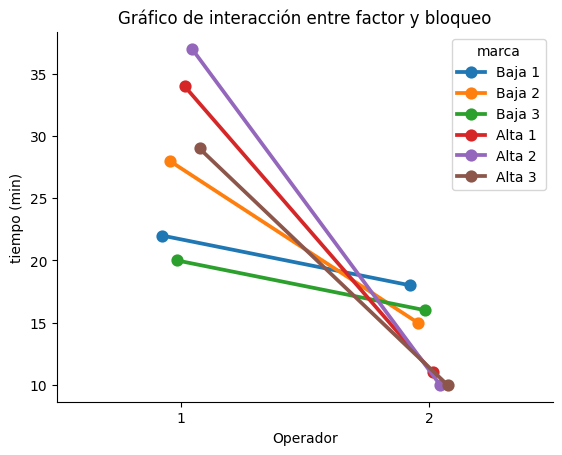

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="geometria", y="respuesta", hue="nivel", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("Operador")
plt.ylabel("tiempo (min)")
plt.legend(title="marca")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

In [ ]:
df.groupby(["geometria"])["respuesta"].mean()

,respuesta
geometria,
1,28.333333
2,13.333333


# 14.10 En un experimento se estudiaron 2 factores de un proceso de manufactura de un circuito integrado. El propósito del experimento es conocer su efecto sobre la resistividad de las obleas de silicio. Los factores son la dosis del implante (2 niveles) y la posición de la caldera (3 niveles). El experimento es costoso, por lo que sólo se hizo una corrida con cada combinación. Los datos son los siguientes.


Se supone que no hay interacción entre esos 2 factores.

a) Escriba el modelo y explique sus términos.

b) Elabore la tabla de análisis de varianza.

c) Explique los 2 grados de libertad del “error”.

d ) Use una prueba de Tukey para hacer pruebas de comparaciones múltiples sobre la posición de la caldera. Explique qué es lo que muestran los resultados

In [ ]:
import pandas as pd
from io import StringIO

data = '''
dosis,posicion,respuesta
1,1,15.5
1,2,14.8
1,3,21.3
2,1,27.2
2,2,24.9
2,3,26.1
'''

df = pd.read_csv(StringIO(data))
df

,dosis,posicion,respuesta
0,1,1,15.5
1,1,2,14.8
2,1,3,21.3
3,2,1,27.2
4,2,2,24.9
5,2,3,26.1


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'respuesta ~ C(dosis) + C(posicion)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(dosis),117.926667,1.0,18.082290,0.051101
C(posicion),15.063333,2.0,1.154868,0.464065
Residual,13.043333,2.0,NaN,NaN


valor-p (Shapiro) = 0.7351982507265403
Los residuos siguen una distribución normal


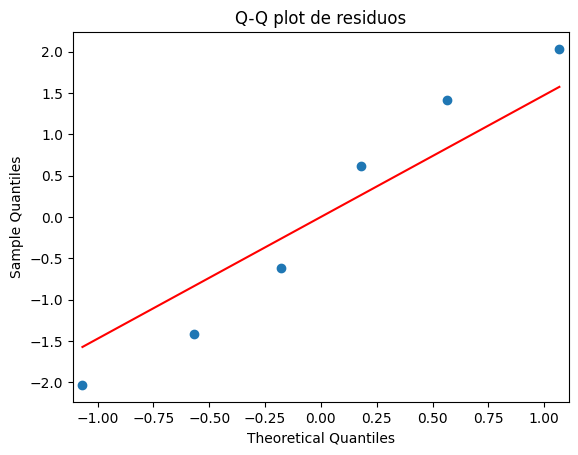

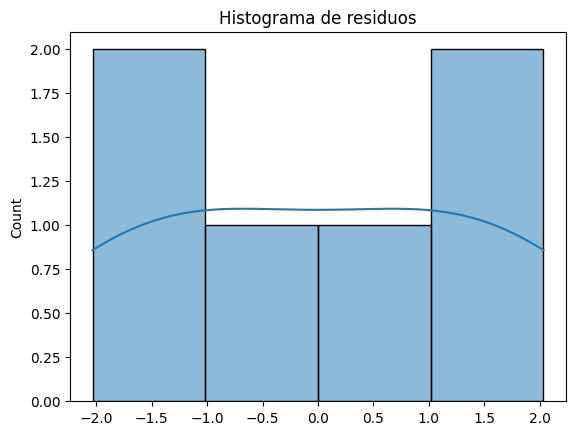

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
if valor_p_sh > 0.05:
    print("Los residuos siguen una distribución normal")
else:
    print("Los residuos no siguen una distribución normal")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['dosis'] == 1]['respuesta']
grupo2 = df[df['dosis'] == 2]['respuesta']

stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.49521741527611557


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2   8.8667 0.0149 2.8574 14.8759   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

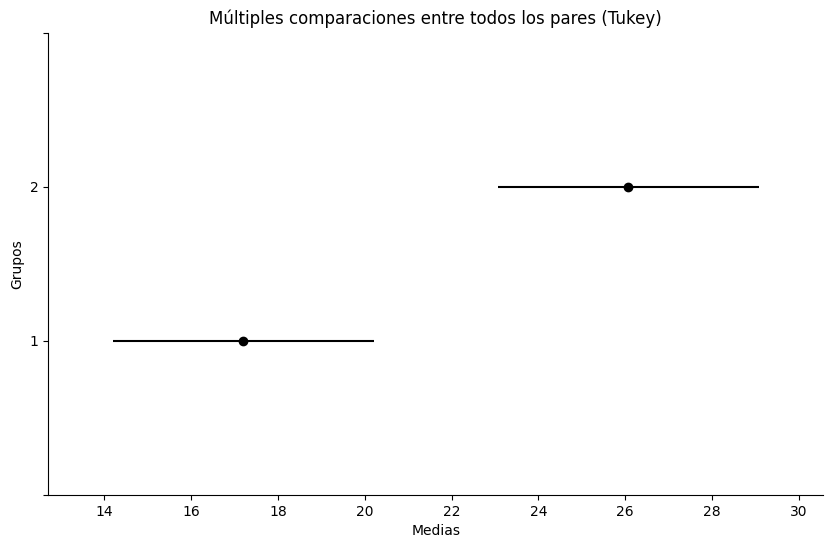

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['respuesta'], groups=df['dosis'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

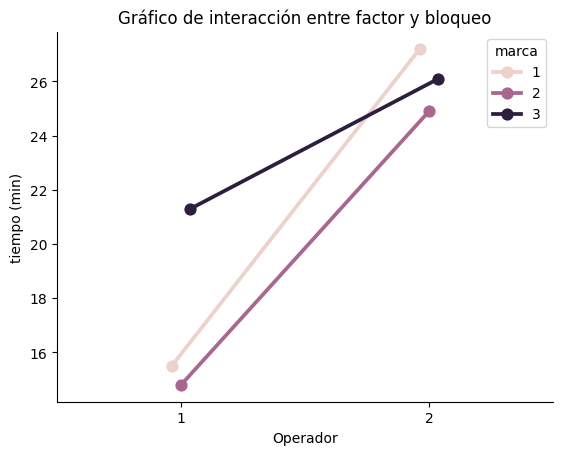

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="dosis", y="respuesta", hue="posicion", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("Operador")
plt.ylabel("tiempo (min)")
plt.legend(title="marca")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

In [ ]:
df.groupby(["dosis"])["respuesta"].mean()

,respuesta
dosis,
1,17.200000
2,26.066667
